In [4]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

In [2]:
jazz = nx.read_gml( 'jazz.gml', label = None)

In [19]:
#transfomation gml to matrix pandas
jazz_edge_df = nx.to_pandas_edgelist(jazz)
jazz_edge_df
F = nx.from_pandas_edgelist(jazz_edge_df, create_using= nx.DiGraph)
jazz_edge_df = nx.to_pandas_edgelist(jazz)


In [5]:
#function to plot posicions
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

100%|██████████| 2000/2000 [00:03<00:00, 627.31it/s]


BarnesHut Approximation  took  0.88  seconds
Repulsion forces  took  1.84  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.09  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


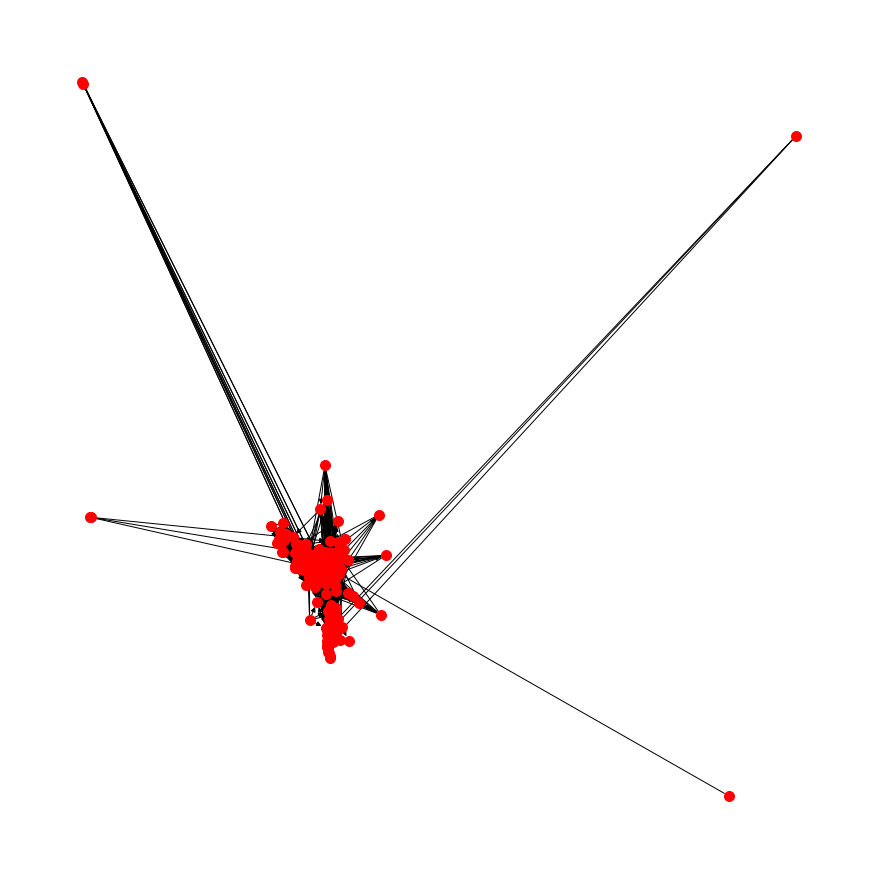

In [24]:
positions = forceatlas2.forceatlas2_networkx_layout(F, pos=None, iterations=2000)
plt.figure(3,figsize=(12,12))
nx.draw(F, with_labels = False,
                node_size = 100,
                node_color= "red",
                 font_color = '32',
                 pos=positions)
plt.show()

100%|██████████| 2000/2000 [00:02<00:00, 686.94it/s]


BarnesHut Approximation  took  0.91  seconds
Repulsion forces  took  1.47  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.18  seconds


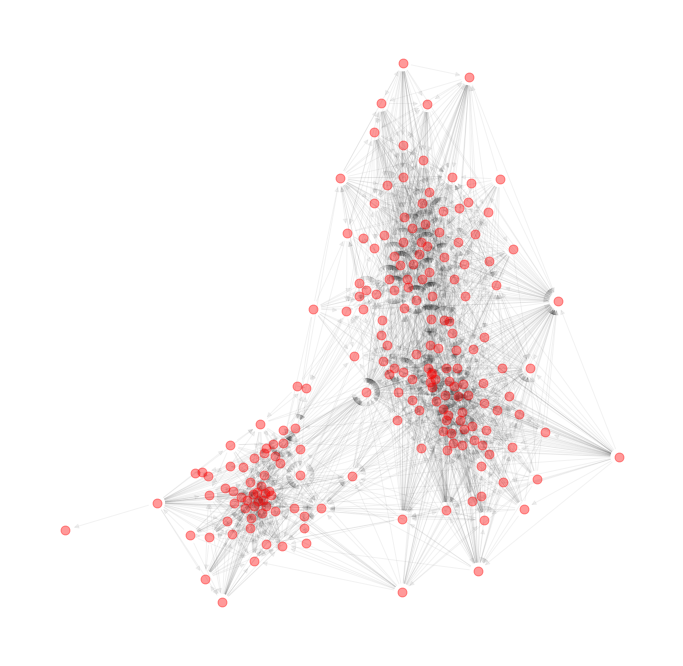

In [21]:

plt.figure(3,figsize=(12,12))
positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=80, node_color="red", alpha=0.4)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.05)
plt.axis('off')
plt.show()

In [ ]:
#coloring by counities modularidad
#readou s
#perimetter
#strongly connnected
#density